# Procesando imágenes con numpy

In [394]:
import matplotlib as plt
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import urllib.request 
from PIL import Image

<br><br><br>
### Creamos un array desde una imagen de internet

In [395]:
url = 'https://www.autopista.es/uploads/s1/11/70/44/38/fernando-alonso-a-uno-de-100-anima-la-f1-e-invita-a-sonar-esta-temporada.jpeg'
internet_image = Image.open(urllib.request.urlopen(url))

In [396]:
#transformamos la imagen en un array
#preparamos 3 arrays por separado para usarlos más adelante en distintos casos

image1 = np.array(internet_image)
image2 = np.array(internet_image)
image3 = np.array(internet_image)
image4 = np.array(internet_image)

<br><br><br>
### Explorando

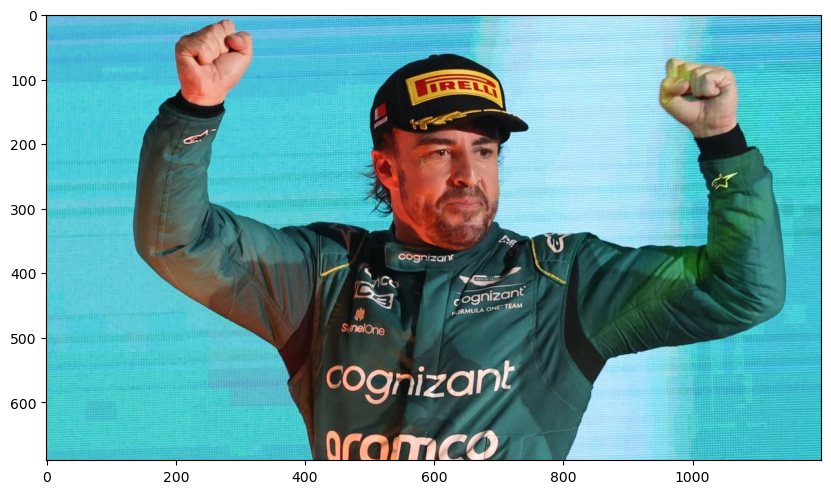

In [397]:
#vemos como luce la imagen
plt.figure(figsize=(10,20))
plt.imshow(image1)


In [398]:
print (image1.shape) #dimensiones (es una matriz de 3 valores, el tercero es 3 por las 3 capas de color)
print (image1.size) #tamaño total = shape*3

(690, 1200, 3)
2484000


In [399]:
print (np.amin(image1), np.amax(image1)) #valor min y max de cada píxel (píxeles de 8 bits)

0 255


In [400]:
print("Fila Completa")
print (image1[150]) #imprimo una fila
print("_____________________")
print("")

Fila Completa
[[ 81 213 225]
 [ 84 216 228]
 [ 71 203 215]
 ...
 [ 47 193 192]
 [ 50 196 195]
 [ 45 191 190]]
_____________________



In [401]:
print("Columna completa")
print (image1[:, 150]) #imprimo una columna
print("_____________________")

Columna completa
[[113 191 229]
 [111 191 228]
 [105 187 224]
 ...
 [ 64 188 198]
 [ 69 193 203]
 [ 80 204 214]]
_____________________


In [402]:
print("")
print("3 Colores de un pixel")
print (image1[150,150]) #imprimo los tres colores de un pixel
print("_____________________")


3 Colores de un pixel
[ 80 208 219]
_____________________


In [403]:

print("")
print("El valor de un color")
print (image1[150,150,2]) #imprimo el azul de un pixel (RGB)


El valor de un color
219


<br><br><br>
### Modificando

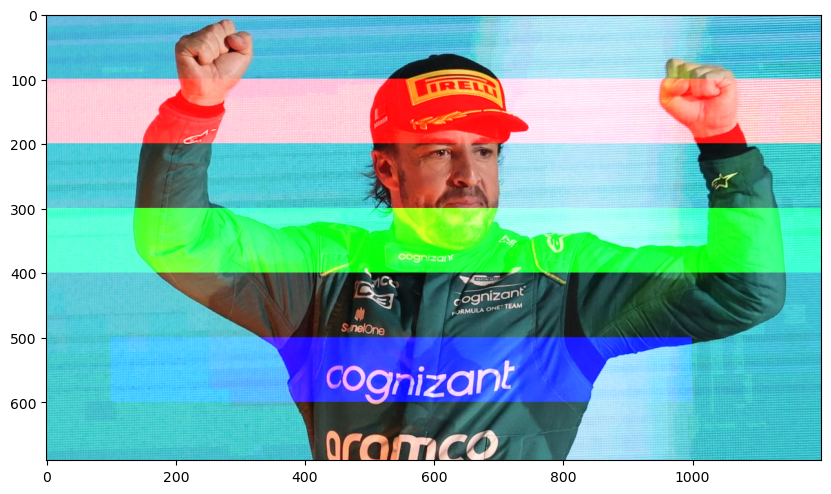

In [404]:
#seleccionamos las filas (todas las columnas) y se lleva al máximo valor de cada color
image2[100:200 , : , 0] = 255 #rojo
image2[300:400 , : , 1] = 255 #verde

#se selecciona un rango de columnas para el color azul
image2[500:600 , 100:1000, 2] = 255 

plt.figure(figsize=(10,20))
plt.imshow(image2)

(690, 1200, 3)
(690, 1200, 3)


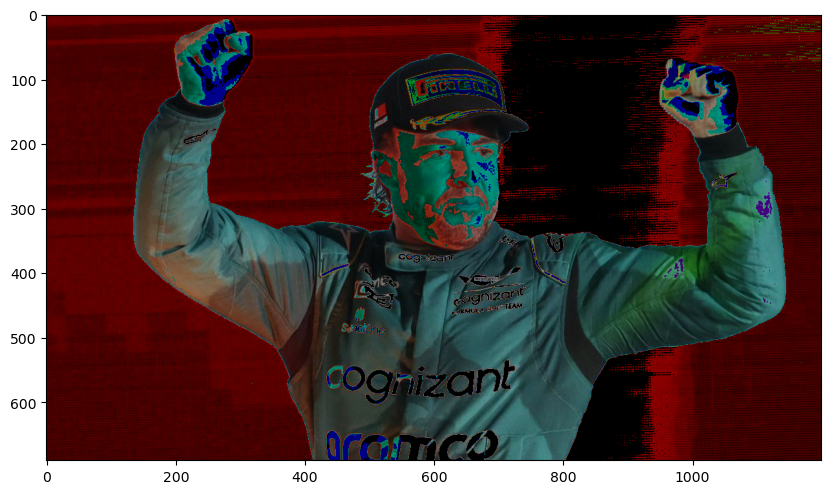

In [405]:
#filtro que selecciona todos los pixeles menores a 150
filtro = image3 > 150 #se creará una matriz booleana del mismo tamaño que la foto
print(filtro.shape)
print (image3.shape)

image3[filtro] = 0 #se aplica el filtro y se pone a cero todos esos píxeles
plt.figure(figsize=(10,20))
plt.imshow(image3)


<br><br><br>
### Crearemos una máscara circular


In [406]:
total_rows, total_cols, total_layers = image1.shape
X, Y = np.ogrid[:total_rows, :total_cols] 
print("X = ", X.shape, ", Y = ", Y.shape) #se guarda en X y en Y los vectores de las dimensiones

X =  (690, 1) , Y =  (1, 1200)


In [407]:
#El índice de la columna y fila central se encuentra en la mitad
center_row, center_col = total_rows / 2, total_cols / 2
print("Fila Central = ", center_row," Columna Central = ", center_col)

Fila Central =  345.0  Columna Central =  600.0


In [408]:
#distancia al centro = (x - centro de x)^2
dist_from_center = (X - center_row)**2 + (Y - center_col)**2

print(dist_from_center) #matriz de distancias al centro
print(np.amax(dist_from_center)) #valor máximo de la matriz


[[479025. 477826. 476629. ... 475434. 476629. 477826.]
 [478336. 477137. 475940. ... 474745. 475940. 477137.]
 [477649. 476450. 475253. ... 474058. 475253. 476450.]
 ...
 [476964. 475765. 474568. ... 473373. 474568. 475765.]
 [477649. 476450. 475253. ... 474058. 475253. 476450.]
 [478336. 477137. 475940. ... 474745. 475940. 477137.]]
479025.0


In [409]:
radius = (total_rows / 2.5)**2 #radio
print("\nEl radio es ", radius)


El radio es  76176.0


(690, 1200)


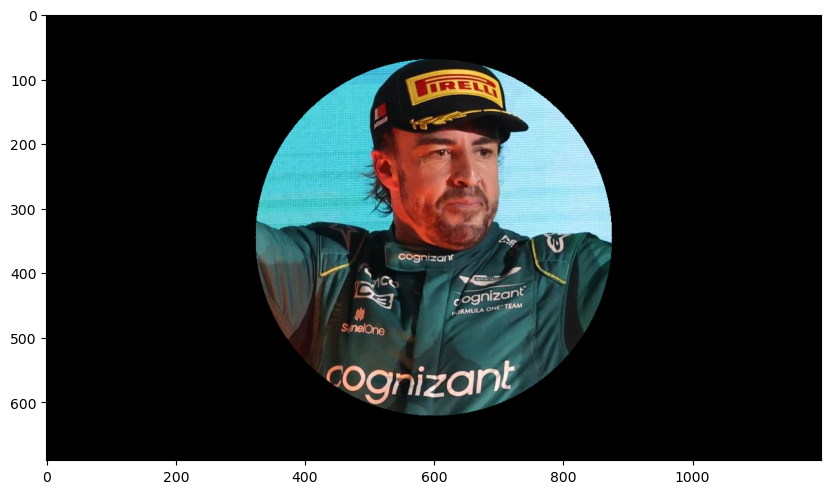

In [410]:
#Máscara circular mayor que el radio
circular_mask = (dist_from_center > radius)
print(circular_mask.shape)

#Se aplica la máscara a la foto
image1[circular_mask] = 0
plt.figure(figsize=(10,20))
plt.imshow(image1)

<br><br><br><h2 style="color:#6699ff">FILTRO DE COLOR</h2>

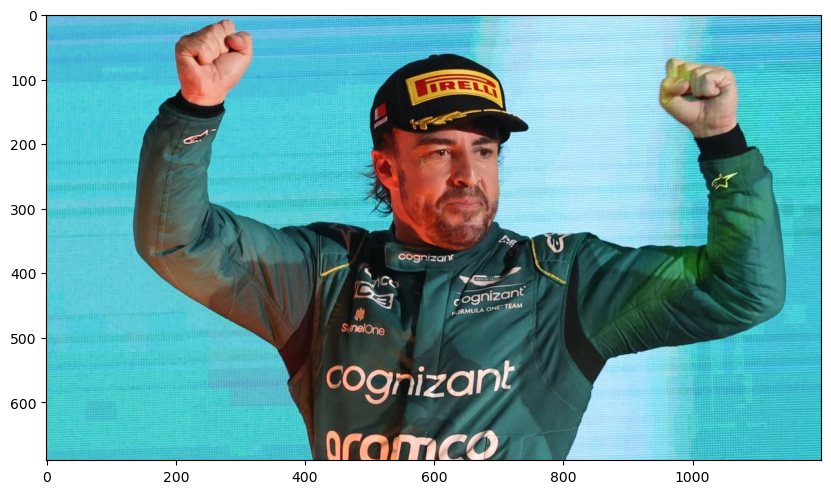

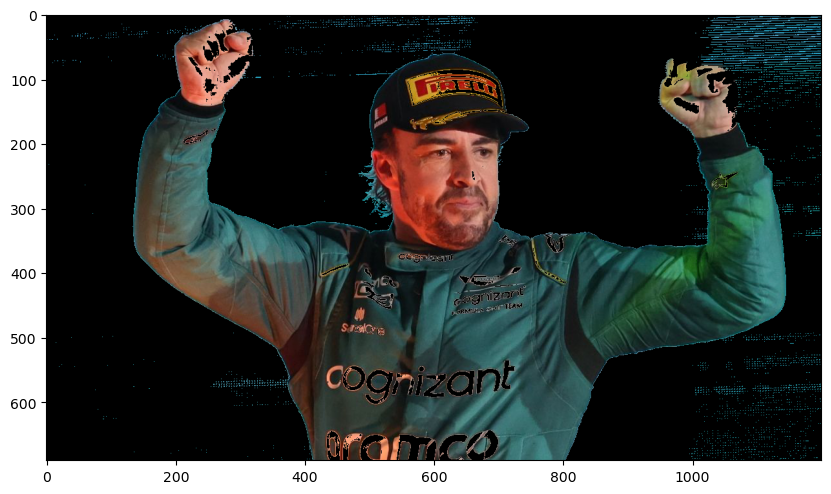

In [411]:
plt.figure(figsize=(10,20))
plt.imshow(image4)

#Máscara que tomará valor true, donde existan valores mayores a 170 en Verde
green_mask = image4[:,:,1]>170

#se aplica la máscara
image4[green_mask,0]=0
image4[green_mask,1]=0
image4[green_mask,2]=0

plt.figure(figsize=(10,20))
plt.imshow(image4)